In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from data_prep import (X_train_scale, y_train,
                       X_test_scale, y_test,
                       train_vectors, test_vectors)
from stopwords import STOPWORDS

/Users/stevedye/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/stevedye/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/stevedye/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [2]:
train_vectors

<15171x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 176965 stored elements in Compressed Sparse Row format>

In [3]:
X_train_scale

array([[ 0.05541827,  0.17282208,  0.64005886, ..., -0.00811909,
        -0.00811909, -0.00811909],
       [-0.99787108, -1.14683899, -0.82146026, ..., -0.00811909,
        -0.00811909, -0.00811909],
       [-0.3207565 , -0.29848544, -0.23685261, ..., -0.00811909,
        -0.00811909, -0.00811909],
       ...,
       [-0.69693126, -0.76979297, -0.52915643, ..., -0.00811909,
        -0.00811909, -0.00811909],
       [ 2.08676202,  2.05805217,  2.68618563, ..., -0.00811909,
        -0.00811909, -0.00811909],
       [-0.01981668, -0.01570093,  0.05545122, ..., -0.00811909,
        -0.00811909, -0.00811909]])

In [4]:
# X_resampled

In [5]:
# y_resampled

In [6]:
# pd.DataFrame(y_resampled)[0].value_counts()

In [7]:
pd.DataFrame(y_train)[0].value_counts()

1    6696
2    4510
0    3965
Name: 0, dtype: int64

In [13]:
clf = RandomForestClassifier(max_depth=3, random_state=0)

In [14]:
clf.fit(X_train_scale, y_train)

/Users/stevedye/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Confusion Matrix
[[   0 1320    2]
 [   0 2229    3]
 [   0 1472   31]]


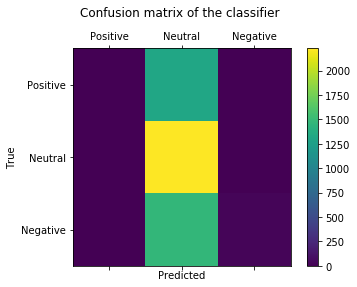

Accuracy is 0.44690527981016415 


In [15]:
y_pred = clf.predict(X_test_scale)
cm = confusion_matrix(y_test , y_pred)
print("Confusion Matrix")
print(cm)
labels=['Positive','Neutral','Negative']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))

In [16]:
scores = cross_val_score(clf, X_train_scale, y_train, cv=5, scoring="accuracy")

In [17]:
scores

array([0.44975288, 0.44561635, 0.44561635, 0.44232037, 0.44528675])